In [11]:
from devito import Eq, Grid, TimeFunction, Operator

grid = Grid(shape=(3, 3))
u = TimeFunction(name='u', grid=grid)

# Domain

In [12]:
print(u.data)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [13]:
eq = Eq(u.forward, u+1)
op = Operator(eq)

In [14]:
print(op)

#define _POSIX_C_SOURCE 200809L
#include "stdlib.h"
#include "math.h"
#include "sys/time.h"
#include "xmmintrin.h"
#include "pmmintrin.h"

struct dataobj
{
  void *restrict data;
  int * size;
  int * npsize;
  int * dsize;
  int * hsize;
  int * hofs;
  int * oofs;
} ;

struct profiler
{
  double section0;
} ;


int Kernel(struct dataobj *restrict u_vec, const int time_M, const int time_m, struct profiler * timers, const int x_M, const int x_m, const int y_M, const int y_m)
{
  float (*restrict u)[u_vec->size[1]][u_vec->size[2]] __attribute__ ((aligned (64))) = (float (*)[u_vec->size[1]][u_vec->size[2]]) u_vec->data;
  /* Flush denormal numbers to zero in hardware */
  _MM_SET_DENORMALS_ZERO_MODE(_MM_DENORMALS_ZERO_ON);
  _MM_SET_FLUSH_ZERO_MODE(_MM_FLUSH_ZERO_ON);
  for (int time = time_m, t0 = (time)%(2), t1 = (time + 1)%(2); time <= time_M; time += 1, t0 = (time)%(2), t1 = (time + 1)%(2))
  {
    struct timeval start_section0, end_section0;
    gettimeofday(&start_section0, NULL);


# Halo

In [15]:
u.data[:] = 1

In [16]:
print(u.data_with_halo)

[[[0. 0. 0. 0. 0.]
  [0. 1. 1. 1. 0.]
  [0. 1. 1. 1. 0.]
  [0. 1. 1. 1. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 1. 1. 1. 0.]
  [0. 1. 1. 1. 0.]
  [0. 1. 1. 1. 0.]
  [0. 0. 0. 0. 0.]]]


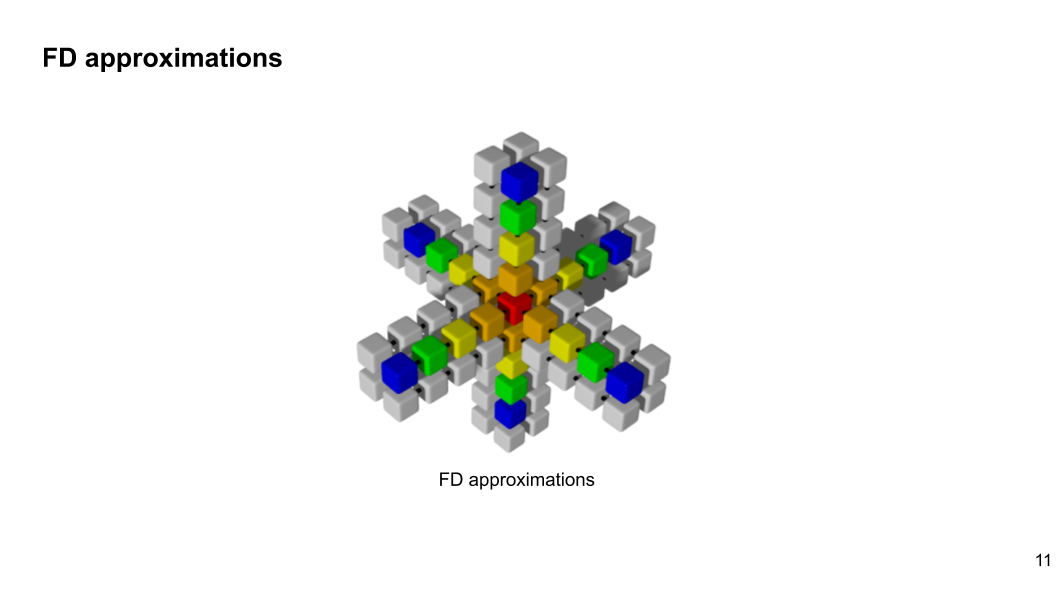

Sometimes, those points may be unnecessary. On the other hand, for instance, depending on the PDE being approximated, more points may be necessary. Thus, Halo default value can be changed by passing a value in **space_order**.


In [6]:
u0 = TimeFunction(name='u0', grid=grid, space_order=0)
u0.data[:] = 1
print(u0.data_with_halo)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [25]:
u2 = TimeFunction(name='u2', grid=grid, space_order=2)
u2.data[:] = 1
print(u2.data_with_halo)

[[[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]]


In [27]:
print(u2._data_allocated)

[[[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]]


# Padding

In [8]:
u_pad = TimeFunction(name='u_pad', grid=grid, space_order=2, padding=((0,0), (2,2), (2,2)))
u_pad.data_with_halo[:] = 1
u_pad.data[:] = 2
print(u_pad._data_allocated)

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 2. 2. 2. 1. 1. 0. 0.]
  [0. 0. 1. 1. 2. 2. 2. 1. 1. 0. 0.]
  [0. 0. 1. 1. 2. 2. 2. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 2. 2. 2. 1. 1. 0. 0.]
  [0. 0. 1. 1. 2. 2. 2. 1. 1. 0. 0.]
  [0. 0. 1. 1. 2. 2. 2. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
  [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
